In [1]:
%load_ext autoreload
%autoreload 2
from tracegraph import draw_dot
from value import Value

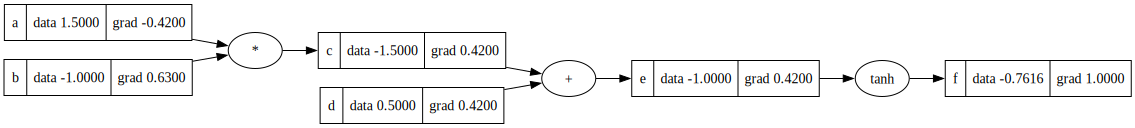

In [2]:
a = Value(1.5)
a.label = "a"
b = Value(-1)
b.label = "b"
c = a * b
c.label = "c"

d = Value(0.5)
d.label = "d"
e = d + c
e.label = "e"

f = e.tanh()
f.label="f"
f.backward()

draw_dot(f)


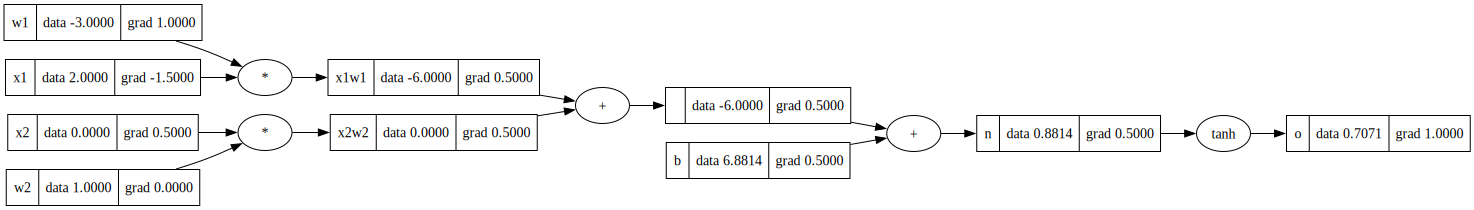

In [3]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
#weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
#bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1w1 + x2w2 + b
x1w1 = x1*w1; x1w1.label = "x1w1"
x2w2 = x2*w2; x2w2.label = "x2w2"
n = x1w1 + x2w2 + b; n.label = "n"
o = n.tanh(); o.label = "o"
o.backward()

draw_dot(o)

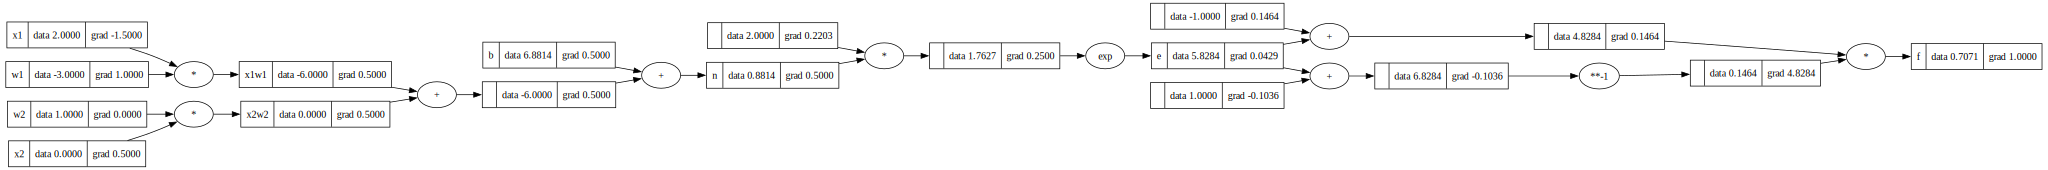

In [4]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
#weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
#bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1w1 + x2w2 + b
x1w1 = x1*w1; x1w1.label = "x1w1"
x2w2 = x2*w2; x2w2.label = "x2w2"
n = x1w1 + x2w2 + b; n.label = "n"

e = (2*n).exp(); e.label = "e"
f = (e-1) / (e + 1); f.label = "f"
f.backward()

draw_dot(f)

In [5]:
import torch

In [6]:
x1 = torch.Tensor([2.0]).double(); x1.requires_grad = True
x2 = torch.Tensor([0.0]).double(); x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double(); w1.requires_grad = True
w2 = torch.Tensor([1.0]).double(); w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double(); b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('--------')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
--------
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [7]:
from neuralnet import Neuron, Layer, MLP

In [11]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=0.07223610714367784)

In [16]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0]

In [ ]:
for _ in range(100):
    ypred = [n(x) for x in xs]
    loss = sum((yp-yt)**2 for (yp, yt) in zip(ypred, ys))
    print(ypred, loss)
    loss.backward()
    for p in n.parameters():
        p.data += -(p.grad * .05)
    n.zero_grad()

[Value(data=0.9999029751784793), Value(data=-0.9999031587418354), Value(data=-0.999869824989178), Value(data=0.999878321576211)] Value(data=5.054321753230595e-08)
[Value(data=0.9999044977044839), Value(data=-0.9999048515627076), Value(data=-0.9998722394083818), Value(data=0.9998802932274237)] Value(data=4.8826393739322364e-08)
[Value(data=0.9999059954571253), Value(data=-0.9999065144532273), Value(data=-0.9998746094863578), Value(data=0.9998822316451653)] Value(data=4.716856784839653e-08)
[Value(data=0.9999074688541543), Value(data=-0.9999081479436538), Value(data=-0.9998769360191905), Value(data=0.9998841374099761)] Value(data=4.556769634629364e-08)
[Value(data=0.9999089183060581), Value(data=-0.9999097525549326), Value(data=-0.9998792197892297), Value(data=0.9998860110919892)] Value(data=4.402180677574174e-08)
[Value(data=0.9999103442161899), Value(data=-0.9999113287988557), Value(data=-0.9998814615653127), Value(data=0.999887853251119)] Value(data=4.252899526570095e-08)
[Value(data=